In this notebook, we demonstrate how to use the ai4stem library to compute FFT-HAADF descriptor of an HAADF image. Also, we discuss how different augmentatation strategies can be used to create a training set that is sufficiently large and information-richt to enable the training of powerful deep-learning models.

In [1]:
from ai4stem.descriptors.fft_haadf import FFT_HAADF
from ai4stem.augmentation.augmentation import Augmentation
from ai4stem.utils.utils_data import load_expimages

import numpy as np
import os
import matplotlib.pyplot as plt

# Load and visualize HAADF images

In [2]:
images, labels = load_expimages()

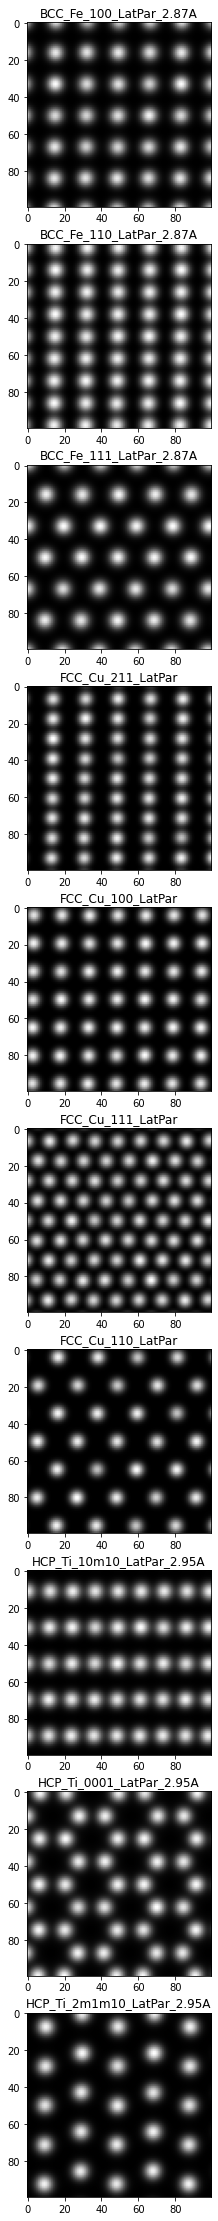

In [3]:
fig, axs = plt.subplots(images.shape[0], 1, figsize=(5, 40))
for i, im in enumerate(images):
    axs[i].imshow(im, cmap='gray')
    axs[i].set_title(labels[i][:-21])
#plt.savefig('all_images.svg')
#plt.close()

# Calculate FFT

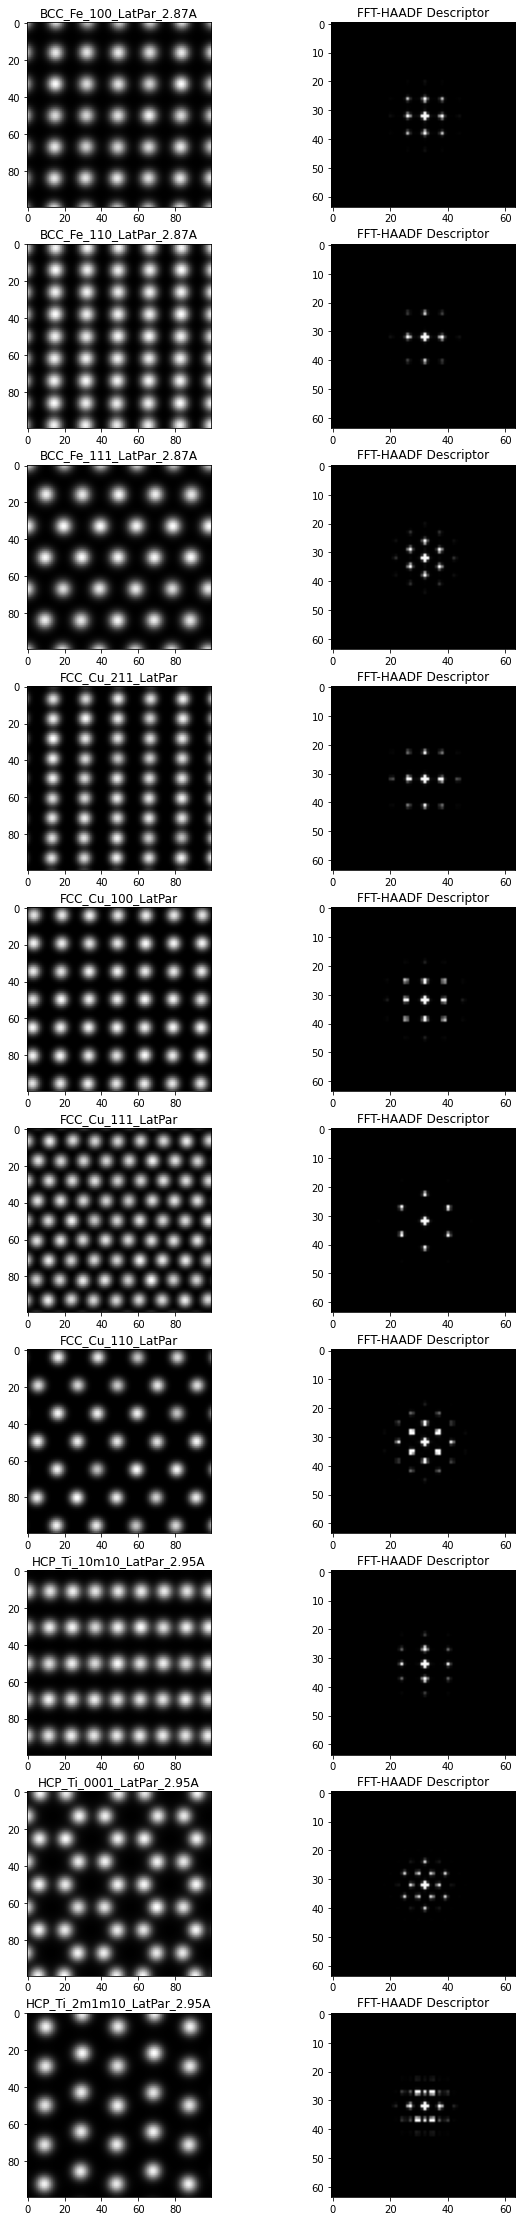

In [4]:
descriptor =  FFT_HAADF()

fig2, axs = plt.subplots(images.shape[0], 2, figsize=(10, 40))
for i, im in enumerate(images):
    axs[i, 0].imshow(im, cmap='gray')
    axs[i, 0].set_title(labels[i][:-21])

    fft_desc = descriptor.calculate(im)

    axs[i, 1].imshow(fft_desc, cmap='gray')
    axs[i, 1].set_title('FFT-HAADF Descriptor')

# Augment images

In [5]:
noise_types = {'blurring': {'blurrings': [2, 4]},
               'gaussian': {'var': [0.01, 0.005]},
               'poisson': {}}

In [6]:
test_image = images[0]


fft_test_image = descriptor.calculate(test_image)
label_test_image = labels[0]

print('Select ' + label_test_image)

Select BCC_Fe_100_LatPar_2.87A_t_80A_STEMsim_ps0.12


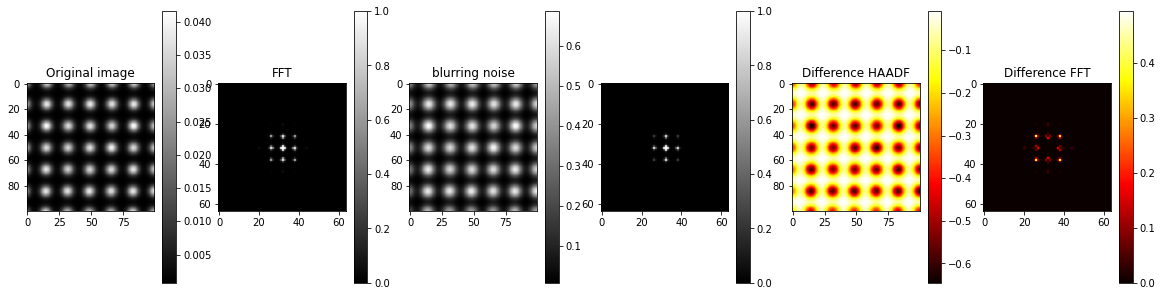

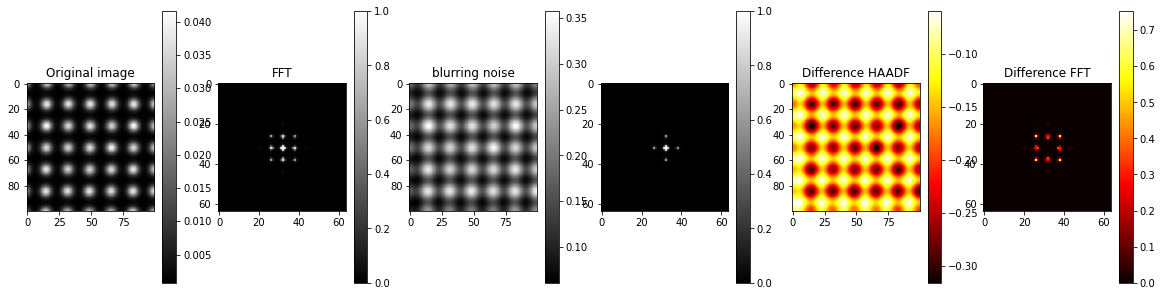

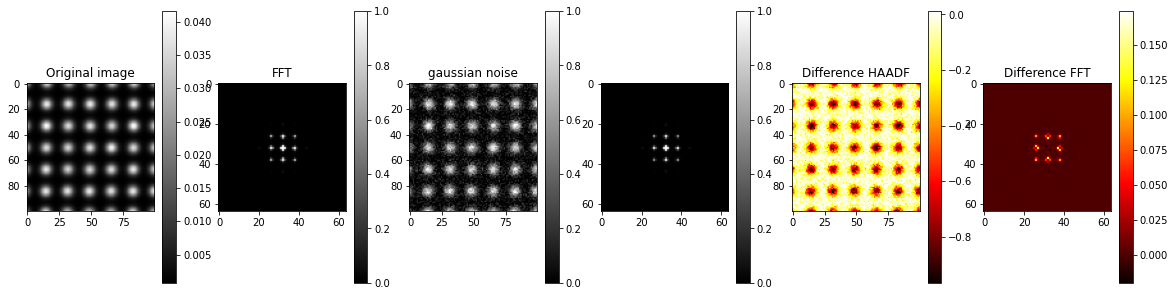

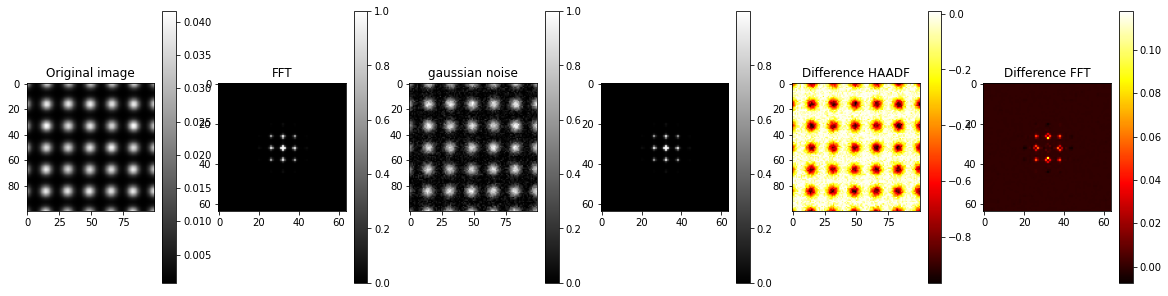

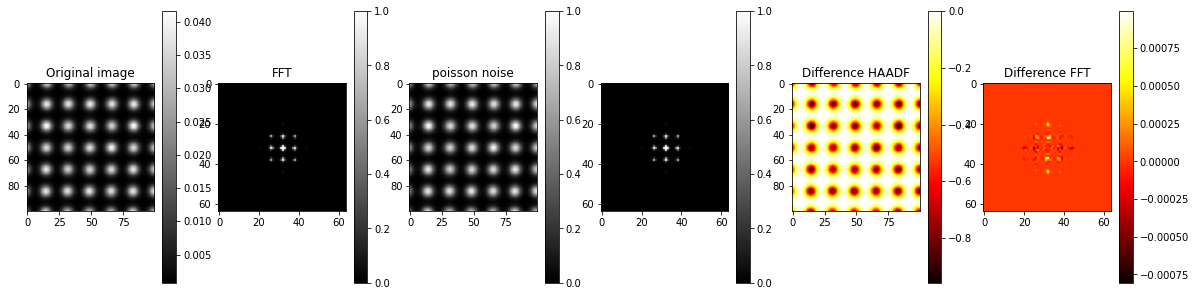

In [7]:
for noise_type in noise_types:

    augmentation = Augmentation(noise_type=noise_type,
                                **noise_types[noise_type])

    distorted_images = augmentation.calculate(test_image)


    for idx in range(distorted_images.shape[0]):

        fig, axs = plt.subplots(1, 6, figsize=(20, 5))
        im1 = axs[0].imshow(test_image, cmap='gray')
        axs[0].set_title('Original image')
        im2 = axs[1].imshow(fft_test_image, cmap='gray')
        axs[1].set_title('FFT')

        im3 = axs[2].imshow(distorted_images[idx], cmap='gray')
        axs[2].set_title('{} noise'.format(noise_type))
        fft_distorted = FFT_HAADF().calculate(distorted_images[idx])
        im4 = axs[3].imshow(fft_distorted, cmap='gray')

        im5 = axs[4].imshow(test_image - distorted_images[idx], cmap='hot')
        axs[4].set_title('Difference HAADF')
        im6 = axs[5].imshow(fft_test_image - fft_distorted, cmap='hot')
        axs[5].set_title('Difference FFT')

        plt.colorbar(im1, ax=axs[0])
        plt.colorbar(im2, ax=axs[1])
        plt.colorbar(im3, ax=axs[2])
        plt.colorbar(im4, ax=axs[3])
        plt.colorbar(im5, ax=axs[4])
        plt.colorbar(im6, ax=axs[5])

        plt.savefig('{}_comparison_FFT_HAADF_{}.png'.format(noise_type, idx))